# Mushrooms

Brendan Reed  
11/11/2025  

This project examines a dataset describing physical characteristics of mushrooms, including whether they are poisonous or edible. By using categorical machine learning to analyze many features, I will try to accurately classify the mushrooms as poisonous or edible.  

[Link to data](https://archive.ics.uci.edu/dataset/73/mushroom)  
[Link to project instructions](https://github.com/denisecase/ml-04/blob/main/CLASSIFICATION_PROJECT.md)

In [1]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

## Section 1. Import and Inspect the Data

### 1.1 Load the dataset and display the first 10 rows.

In [2]:
# fetch dataset
mushroom = fetch_ucirepo(id=73) 
  
# data (as pandas dataframes) 
df = mushroom.data.original
# X = mushroom.data.features 
# y = mushroom.data.targets

In [3]:
print(df.head(10))

  cap-shape cap-surface cap-color bruises odor gill-attachment gill-spacing  \
0         x           s         n       t    p               f            c   
1         x           s         y       t    a               f            c   
2         b           s         w       t    l               f            c   
3         x           y         w       t    p               f            c   
4         x           s         g       f    n               f            w   
5         x           y         y       t    a               f            c   
6         b           s         w       t    a               f            c   
7         b           y         w       t    l               f            c   
8         x           y         w       t    p               f            c   
9         b           s         y       t    a               f            c   

  gill-size gill-color stalk-shape  ... stalk-color-above-ring  \
0         n          k           e  ...                      w  

### 1.2 Check for missing values and display summary statistics.

In [4]:
print("info: ")
df.info()
print(f"describe: \n{df.describe()}")
print(f"sum of null values: \n{df.isnull().sum()}")
print(f"columns: \n{df.columns}")

info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                5644 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below

<b>Reflection 1: What do you notice about the dataset? Are there any data issues?</b>  
Stalk root is missing 2480 instances out of 8124.

## Section 2. Data Exploration and Preparation

### 2.1 Explore data patterns and distributions

Create count plots for categorical variables.

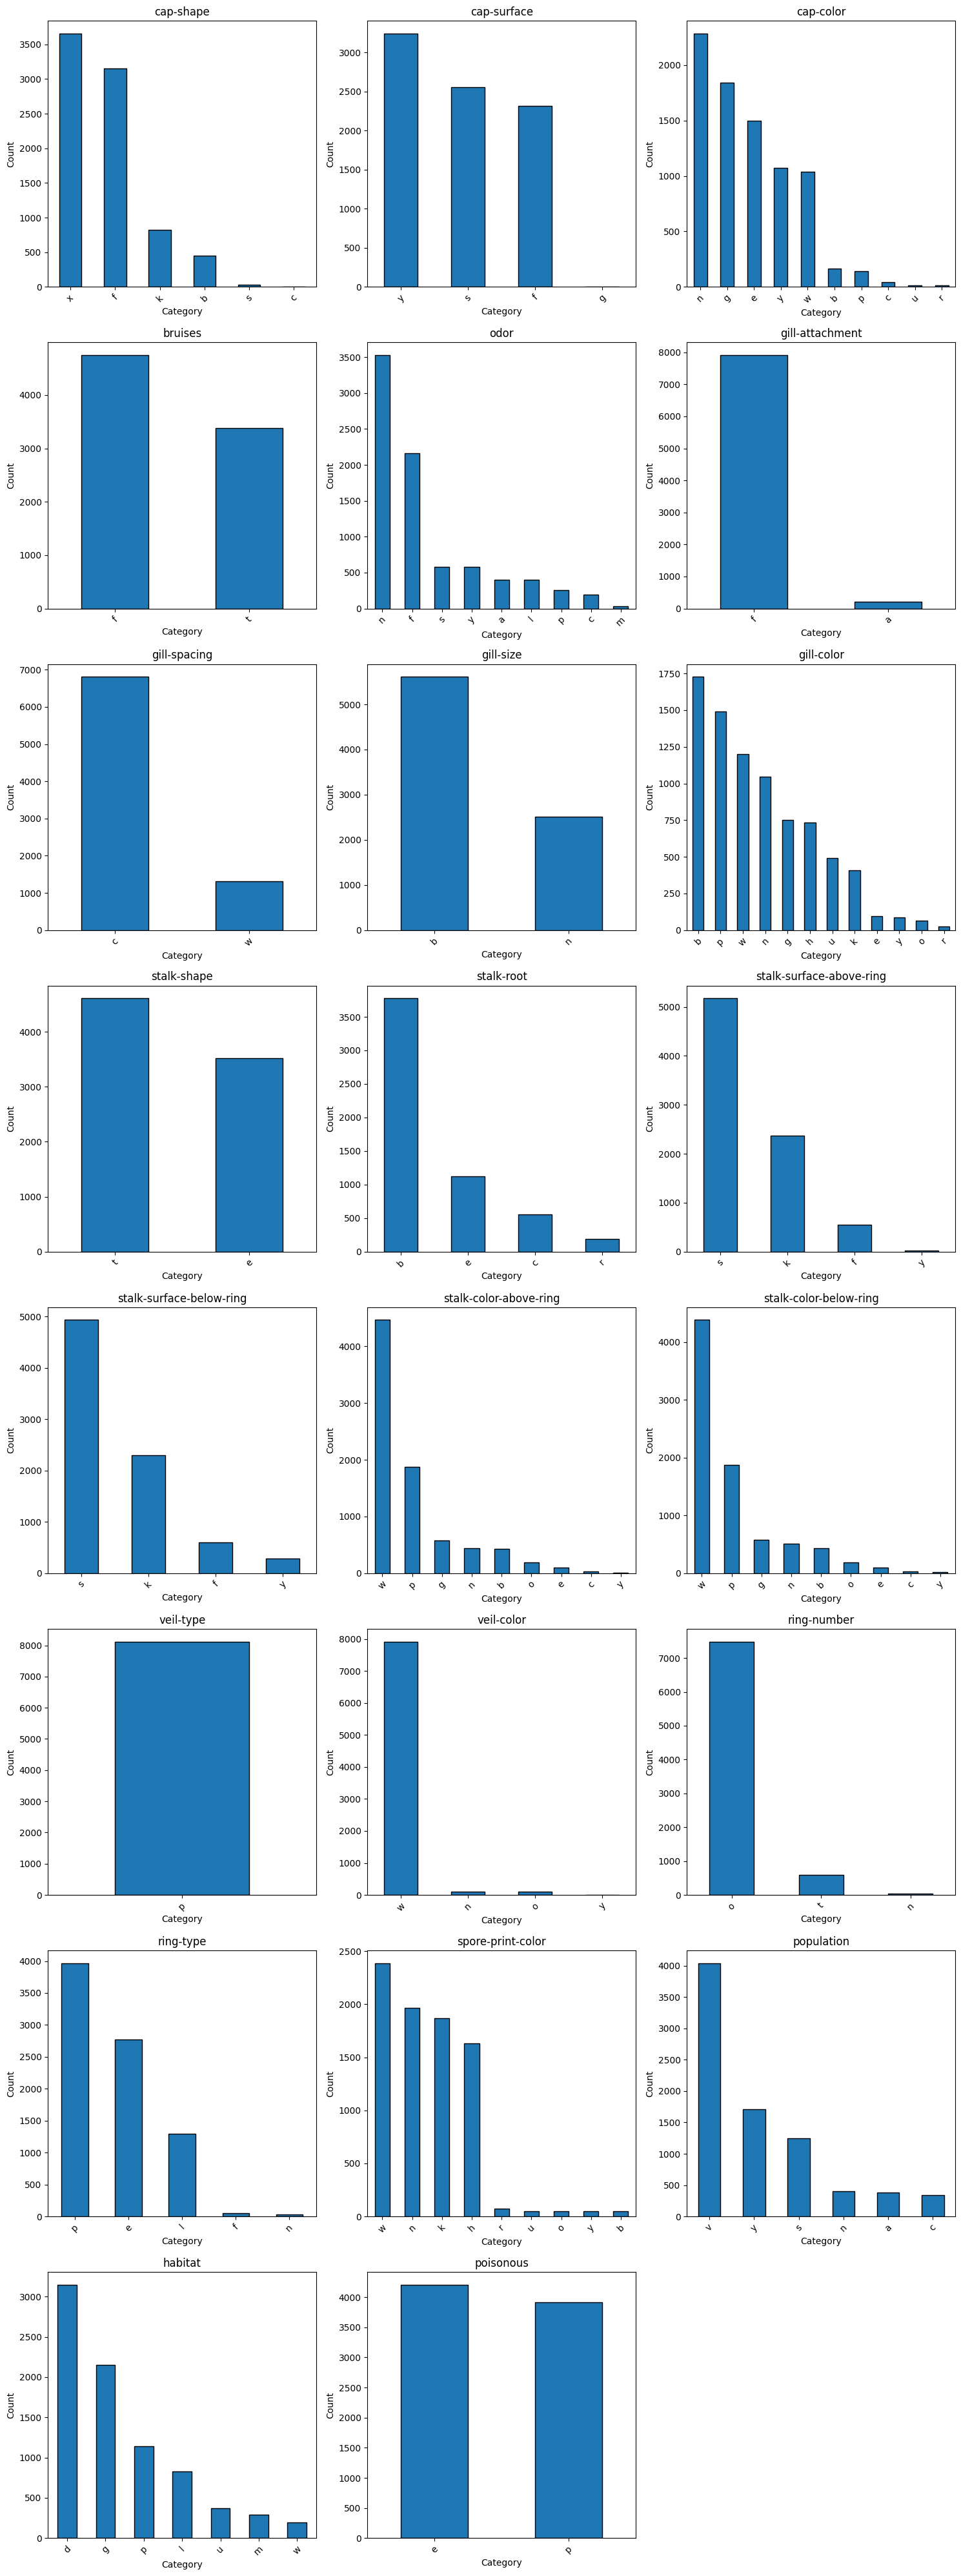

In [5]:
# Get categorical columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

# Calculate grid dimensions
n_cols = len(cat_cols)
n_rows = (n_cols + 2) // 3  # 3 columns per row

fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    df[col].value_counts().plot(kind='bar', ax=axes[i], edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel('Category')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

# Hide empty subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

As seen by the "poisonous" count plot, there is little class imbalance. This prevents models from having bias towards an overrepresented feature. This also means that metrics like accuracy will truly reflect performance and not just the dominance of one class.

### 2.2 Handle missing values and clean data

Impute or drop missing values (as applicable).

In [6]:
df = df.drop(columns="stalk-root")

Convert categorical data to numerical format using encoding (as applicable).

In [7]:
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

### 2.3 Feature selection and engineering

#### Reflection 2:
<b>What patterns or anomalies do you see?  </b>  
All labels within the features are very unbalanced. The frequencies are quite different. However, I still believe they will have predictive value, especially since there are 22 features.

<b>Do any features stand out?  </b>  
All instances have only one veil-type, so that feature won't be useful for making predictions.  
Many other features have labels that have very low occurences for specific labels.

<b>What preprocessing steps were necessary to clean and improve the data?  </b>
I removed the stalk-type feature because 30.5% of instances were missing values.

<b>Did you create or modify any features to improve performance?  </b>  
Not at this time. I would first like to see how the features perform in a model as-is.

## Section 3. Feature Selection and Justification

### 3.1 Choose features and target

In [8]:
X = df.drop(columns=["veil-type","poisonous"])
y = df["poisonous"]

#### Reflection 3:  
<b>Why did you choose these features?</b>  
I chose all features except veil-type, which only had one label. I am hoping that all features together will help with classification. When identifying a mushroom, I think it would make sense to take into account as many observations as possible.

<b>How might they impact predictions or accuracy?</b>  
I believe that the combination of features will increase accuracy. I suppose it is possible that one or more features could be not related to whether or not a mushroom is poisonous, and decrease accuracy. However, I think other more relevant features would then carry more weight, so less relevant features would be of small consequence.


### 4.1 Split the data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      
    random_state=42,    
    stratify=y          
)

### 4.2 Train model

In [10]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


### 4.3 Evalulate performance

In [11]:
y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9969230769230769

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       0.99      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625


Confusion Matrix:
[[838   4]
 [  1 782]]


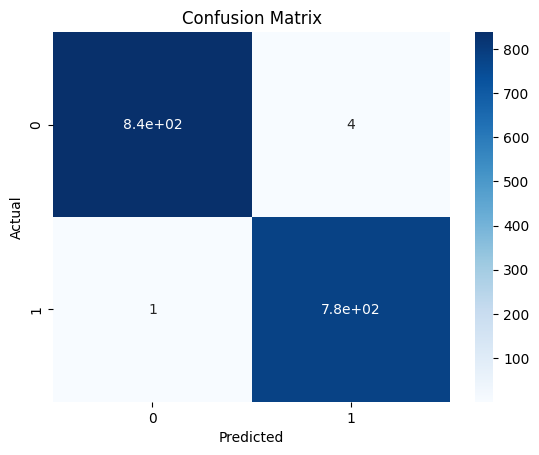

In [12]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Section 5. Improve the Model or Try Alternates

5.1 Train an alternative classifier (e.g., Decision Tree, Random Forest, Logistic Regression) OR adjust hyperparameters on the original model. Compare performance of all models across the same performance metrics.

In [13]:
k_values = range(1, 31)
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

print(list(zip(k_values, accuracies)))

[(1, 1.0), (2, 1.0), (3, 1.0), (4, 0.9993846153846154), (5, 0.9969230769230769), (6, 0.9963076923076923), (7, 0.9956923076923077), (8, 0.9889230769230769), (9, 0.9895384615384616), (10, 0.9876923076923076), (11, 0.9870769230769231), (12, 0.9870769230769231), (13, 0.9876923076923076), (14, 0.9870769230769231), (15, 0.9876923076923076), (16, 0.9864615384615385), (17, 0.9858461538461538), (18, 0.9833846153846154), (19, 0.9827692307692307), (20, 0.9803076923076923), (21, 0.9803076923076923), (22, 0.9796923076923076), (23, 0.9803076923076923), (24, 0.9790769230769231), (25, 0.9790769230769231), (26, 0.9772307692307692), (27, 0.9778461538461538), (28, 0.9753846153846154), (29, 0.976), (30, 0.9747692307692307)]


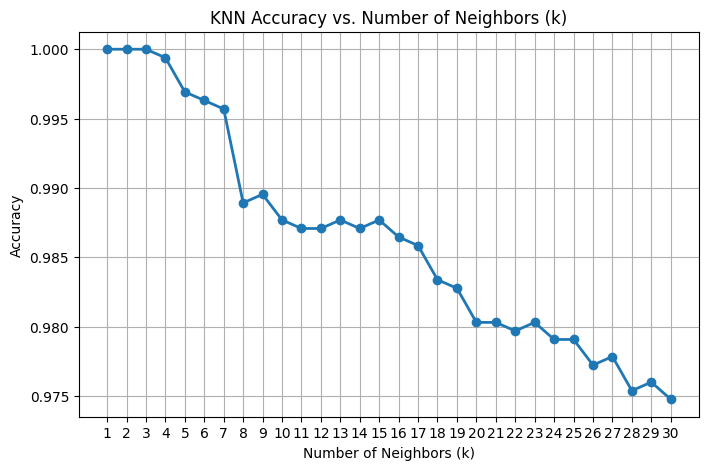

In [14]:
plt.figure(figsize=(8,5))
plt.plot(k_values, accuracies, marker='o', linestyle='-', linewidth=2)
plt.title('KNN Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(k_values)
plt.show()


In [15]:
for k in [1, 2, 3]:
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X, y, cv=5)
    print(f"k={k}: mean={scores.mean():.4f}, std={scores.std():.4f}")

k=1: mean=0.8960, std=0.1331
k=2: mean=0.8880, std=0.1243
k=3: mean=0.8801, std=0.1469


#### Reflection 5:  
<b>Which model performed better?</b>  
After testing k nearest neighbors hyperparamters for k values 1-30, k=1 performed the best.

<b>Why might one classifier be more effective in this specific case?</b>  
k=1 had the highest accuracy of all k values (tied with k=2 and k=3) when trained on the train_test_split results. k=1 had a higher accuracy than k=2 and k=3 with cross validation and had a relatively low standard deviation.

## Section 6. Final Thoughts & Insights

### 6.1 Summarize findings  
K nearest neighbors acheived 100% accuracy with k=1 when evaluated on the test set. This means that the mushroom dataset is highly seperable.

### 6.2 Discuss challenges faced

All features were categorical, so they all had to be encoded to be used in a model.

### 6.3 If you had more time, what would you try next?

- Create visualizations to see how k nearest neighbors is making decisions
- Create a decision tree so that model decisions could be easily interpreted
- Try regression after encoding variables with OneHotEncoder just to see if it works as well

Reflection 6: What did you learn from this project?  
- The mushroom dataset is very seperable, meaning that with all of the features, the mushrooms can be classified as edible or poisonous with 100% accuracy.
- We can try K nearest neighbors with many different values for K, evaluate model performance, and choose the K value with the highest accuracy.
- When choosing between K values that perform identically on the test set, cross validation can be used to compare them. We can then select the K value with the highest accuracy and lowest standard deviation.